Name: Corbaley, Jason
Class: DSC 530
Assignment: Final Project
Date: November 16, 2019

The goal of this project is to look at data from the past Professional Golfers Association's (PGA) history to see if a higher fairway hit percentage relates to the amount of money made on the PGA tour. I obtained my data from Kaggle.com.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

pga_data = pd.read_csv('pgaTourData.csv')

#Replacing nan values with 0 in the columns that should show 0 instead of nan. 

pga_data[['Wins', 'Top 10', 'Money']] = pga_data[['Wins', 'Top 10', 'Money']].fillna(0)

#Droping the unnecessary columns that aren't related to my analysis.

pga_data.drop(['Rounds', 'Average Putts', 'Average Scrambling', 'Average Score', 'Points', 'Average SG Putts',
               'Average SG Total', 'SG:OTT', 'SG:APR', 'SG:ARG'], axis = 1, inplace = True)

#Removing the rows with NaN values.

pga_data["Money"] = pga_data["Money"].replace(["\$", ','],"", regex=True).astype(int)


pga_data.dropna(inplace = True)

pga_data['Money'].astype(int)

print(pga_data.dtypes)
pga_data.head()

       
    

Player Name            object
Fairway Percentage    float64
Year                    int64
Avg Distance          float64
gir                   float64
Wins                  float64
Top 10                float64
Money                   int64
dtype: object


,Player Name,Fairway Percentage,Year,Avg Distance,gir,Wins,Top 10,Money
0,Henrik Stenson,75.19,2018,291.5,73.51,0.0,5.0,2680487
1,Ryan Armour,73.58,2018,283.5,68.22,1.0,3.0,2485203
2,Chez Reavie,72.24,2018,286.5,68.67,0.0,3.0,2700018
3,Ryan Moore,71.94,2018,289.2,68.80,0.0,5.0,1986608
4,Brian Stuard,71.44,2018,278.9,67.12,0.0,3.0,1089763


Player Name – The name of the player.

Fairway percentage – The percent of times a fairway was hit after the tee shot.

Avg Distance – The average driving distance hit off the tee.

GIR – The percent amount of greens hit in regulation.

Top 10 – The amount of time the player was in the top 10 of a tournament. 

Wins – The amount of wins the player had.

Money – The amount of money earned by the player during the season. 

In [2]:
pga_data.isnull().sum()

Player Name           0
Fairway Percentage    0
Year                  0
Avg Distance          0
gir                   0
Wins                  0
Top 10                0
Money                 0
dtype: int64

Mean = 61.44
Min = 43.02
Max = 76.88
Range = 33.86


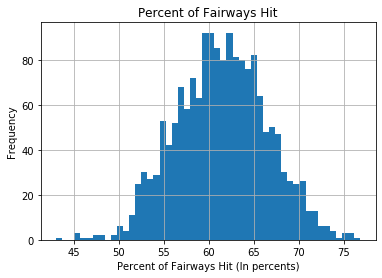

In [3]:
#Histogram of percent of fairways hit.

hist_plot = pga_data['Fairway Percentage'].hist(bins=50)
hist_plot.set_title('Percent of Fairways Hit')
hist_plot.set_xlabel('Percent of Fairways Hit (In percents)')
hist_plot.set_ylabel('Frequency')

fairway_mean = pga_data['Fairway Percentage'].mean()
fairway_mode = pga_data['Fairway Percentage'].mode()
fairway_min = pga_data['Fairway Percentage'].min()
fairway_max = pga_data['Fairway Percentage'].max()

print('Mean =', round(fairway_mean, 2))
print('Min =', fairway_min)
print('Max =', fairway_max)
print('Range =', round(fairway_max - fairway_min, 2))

The percent of fairways hit is distributed normally. The mean is 61.44%, the min is 43.02%, the max is 76.88%, and the range is 33.86%. There looks like there is an outlier to the left. It could have been caused by a player getting injured so it caused him to have a bad/short season.   

Mean = 290.81
Min = 266.4
Max = 319.7
Range = 53.3


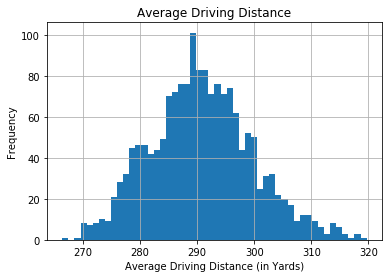

In [4]:
#Histogram of average driving distance
hist_plot = pga_data['Avg Distance'].hist(bins=50)
hist_plot.set_title('Average Driving Distance')
hist_plot.set_xlabel('Average Driving Distance (in Yards)')
hist_plot.set_ylabel('Frequency')

distance_mean = pga_data['Avg Distance'].mean()
distance_mode = pga_data['Avg Distance'].mode()
distance_min = pga_data['Avg Distance'].min()
distance_max = pga_data['Avg Distance'].max()

print('Mean =', round(distance_mean, 2))
print('Min =', distance_min)
print('Max =', distance_max)
print('Range =', round(distance_max - distance_min, 2))

The average driving distance is distributed normally. Our summary statistics are: 

Mean mean driving distance is 290.81 
Minimum average driving distance = 266.4 yards
Maximum average driving distance = 319.7 yards
Range of the average driving distances = 53.3 yards

There are no outliers in the data. The center of the data has a large spike in the middle. It looks to be really close where the mean is so it makes sense there are a lot of people that have an average driving distance around 290 yards. 

Mean = 65.66
Min = 53.54
Max = 73.52
Range = 19.98


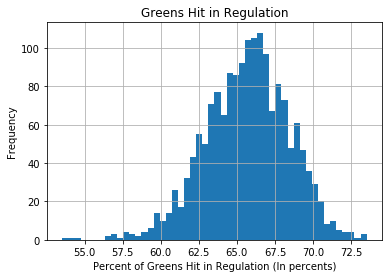

In [5]:
hist_plot = pga_data['gir'].hist(bins=50)
hist_plot.set_title('Greens Hit in Regulation')
hist_plot.set_xlabel('Percent of Greens Hit in Regulation (In percents)')
hist_plot.set_ylabel('Frequency')

gir_mean = pga_data['gir'].mean()
gir_mode = pga_data['gir'].mode()
gir_min = pga_data['gir'].min()
gir_max = pga_data['gir'].max()

print('Mean =', round(gir_mean, 2))
print('Min =', gir_min)
print('Max =', gir_max)
print('Range =', round(gir_max - gir_min, 2))

The Greens Hit in regulation is also normally distributed. There looks to be one outlier out to the right. It's not a major outlier but it does lie further away from the data set. It looks like the outlier is around 3% off of the rest of the data. Even though it is only off by 3%, I would consider this an outlier because in the professional golf association the pros are really close in their stats. There can be an outlier here because the player may have only played a small amout of rounds on the tour and had a bad season. Our other summary statistics are:

Mean GIR = 65.66%
Minimum GIR = 53.54%
Maximum GIR = 73.52%
Range of GIR = 19.98%


Mean = 2.33
Min = 0.0
Max = 14.0
Range = 14.0


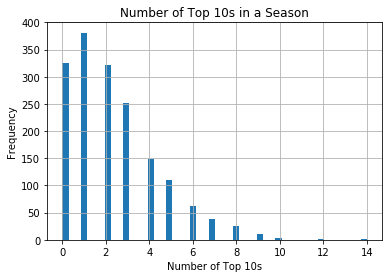

In [6]:
#Number of top 10s a player had.

hist_plot = pga_data['Top 10'].hist(bins=50)
hist_plot.set_title('Number of Top 10s in a Season')
hist_plot.set_xlabel('Number of Top 10s')
hist_plot.set_ylabel('Frequency')

Top10_mean = pga_data['Top 10'].mean()
Top10_mode = pga_data['Top 10'].mode()
Top10_min = pga_data['Top 10'].min()
Top10_max = pga_data['Top 10'].max()

print('Mean =', round(Top10_mean, 2))
print('Min =', Top10_min)
print('Max =', Top10_max)
print('Range =', round(Top10_max - Top10_min, 2))

This data is skewed to the right. This makes sense for the number of top 10s made in a season. It makes sense because there in every tournament there can only be 10 people in the top 10. That means a lot of the players won't make a top 10 or may only get in the top 10 1 or 2 times which we see in the data. There are two outliers at 12 and 14. These players had a particularly good season. I will leave them in there because though uncommon it is possible for a player to have those numbers. 

Mean = 1485132.83
Min = 0
Max = 12030465
Range = 12030465


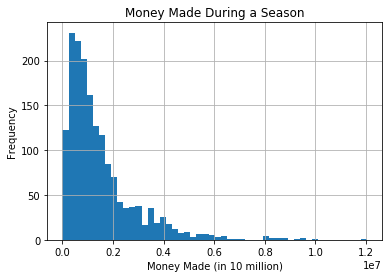

In [7]:
#Money a player made during the season.

hist_plot = pga_data['Money'].hist(bins=50)
hist_plot.set_title('Money Made During a Season')
hist_plot.set_xlabel('Money Made (in 10 million)')
hist_plot.set_ylabel('Frequency')

Money_mean = pga_data['Money'].mean()
Money_mode = pga_data['Money'].mode()
Money_min = pga_data['Money'].min()
Money_max = pga_data['Money'].max()

print('Mean =', round(Money_mean, 2))
print('Min =', Money_min)
print('Max =', Money_max)
print('Range =', round(Money_max - Money_min, 2))

This data is skewed to the right. There is an outlier off to the right. This can be contributed to a player placing higher in a tournament. This goes with the rest of our data because when we looked at the Top 10 variable we noticed there was one outlier to the right as well. The outlier we see here could be related to that one. The range doesn't tell us too much here because there are guys who don't make any money for the season so the range is just our max. The max at $12 million makes sense because the last tournament of the year the winner gets $10 million. 

<function matplotlib.pyplot.show(*args, **kw)>

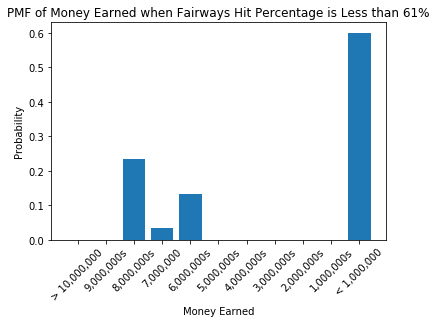

In [109]:
#Here I filtered the Fairway Percentage column to less than 61 percent. Then, I counted the number of players that
#were with in a certain range of money and created a new data frame. Next is the PMF.

pga_fair_low = pga_data[pga_data['Fairway Percentage'] < 61]
pga_money1 = pga_fair_low[pga_fair_low['Money'] > 10000000].count()
pga_money2 = pga_fair_low[(pga_fair_low['Money'] < 999999) & (pga_fair_low['Money'] > 9000000) ].count()
pga_money3 = pga_fair_low[(pga_fair_low['Money'] < 8999999) & (pga_fair_low['Money'] > 8000000) ].count()
pga_money4 = pga_fair_low[(pga_fair_low['Money'] < 7999999) & (pga_fair_low['Money'] > 7000000) ].count()
pga_money5 = pga_fair_low[(pga_fair_low['Money'] < 6999999) & (pga_fair_low['Money'] > 6000000) ].count()
pga_money6 = pga_fair_low[(pga_fair_low['Money'] < 599999) & (pga_fair_low['Money'] > 5000000) ].count()
pga_money7 = pga_fair_low[(pga_fair_low['Money'] < 499999) & (pga_fair_low['Money'] > 4000000) ].count()
pga_money8 = pga_fair_low[(pga_fair_low['Money'] < 399999) & (pga_fair_low['Money'] > 3000000) ].count()
pga_money9 = pga_fair_low[(pga_fair_low['Money'] < 299999) & (pga_fair_low['Money'] > 2000000) ].count()
pga_money10 = pga_fair_low[(pga_fair_low['Money'] < 199999) & (pga_fair_low['Money'] > 1000000) ].count()
pga_money11 = pga_fair_low[pga_fair_low['Money'] < 99999].count()


money_df1 = pd.DataFrame(pga_money1)
money_df2 = pd.DataFrame(pga_money2)
money_df3 = pd.DataFrame(pga_money3)
money_df4 = pd.DataFrame(pga_money4)
money_df5 = pd.DataFrame(pga_money5)
money_df6 = pd.DataFrame(pga_money6)
money_df7 = pd.DataFrame(pga_money7)
money_df8 = pd.DataFrame(pga_money8)
money_df9 = pd.DataFrame(pga_money9)
money_df10 = pd.DataFrame(pga_money10)
money_df11 = pd.DataFrame(pga_money11)

frames = [money_df1, money_df2, money_df3, money_df4, money_df5, money_df6, money_df7, money_df8, money_df9,
         money_df10, money_df11]
                                    
combined = pd.concat(frames, axis = 1) 

combined.columns = ['> 10,000,000', '9,000,000s', '8,000,000s', '7,000,000', '6,000,000s', '5,000,000s', '4,000,000s',
                   '3,000,000s', '2,000,000s', '1,000,000s', '< 1,000,000']
combined

combined2 = pd.DataFrame.transpose(combined)

pga_fair = combined2['Fairway Percentage']
pga_fair2 = pd.DataFrame(pga_fair)
pga_fair2 = pga_fair2.rename(columns = {'Fairway Percentage': 'Counts'})
total = pga_fair2['Counts'].sum()
pga_fair2['Fairway Percentage'] = pga_fair.index
pga_fair2['Probability'] = pga_fair2['Counts']/total
plt.bar(pga_fair2['Fairway Percentage'], pga_fair2['Probability'])
plt.xlabel('Money Earned')
plt.ylabel('Probability')
plt.title('PMF of Money Earned when Fairways Hit Percentage is Less than 61%')
plt.xticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

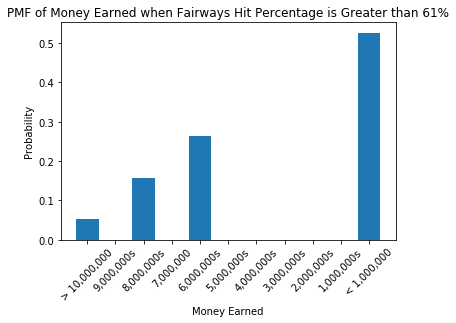

In [110]:
#Here I filtered the Fairway Percentage column to greater than 61 percent. Then, I counted the number of players that
#were with in a certain range of money and created a new data frame. Next is the PMF.
pga_fair_high = pga_data[pga_data['Fairway Percentage'] > 61]
pga_money12 = pga_fair_high[pga_fair_high['Money'] > 10000000].count()
pga_money13 = pga_fair_high[(pga_fair_high['Money'] < 999999) & (pga_fair_high['Money'] > 9000000) ].count()
pga_money14 = pga_fair_high[(pga_fair_high['Money'] < 8999999) & (pga_fair_high['Money'] > 8000000) ].count()
pga_money15 = pga_fair_high[(pga_fair_high['Money'] < 7999999) & (pga_fair_high['Money'] > 7000000) ].count()
pga_money16 = pga_fair_high[(pga_fair_high['Money'] < 6999999) & (pga_fair_high['Money'] > 6000000) ].count()
pga_money17 = pga_fair_high[(pga_fair_high['Money'] < 599999) & (pga_fair_high['Money'] > 5000000) ].count()
pga_money18 = pga_fair_high[(pga_fair_high['Money'] < 499999) & (pga_fair_high['Money'] > 4000000) ].count()
pga_money19 = pga_fair_high[(pga_fair_high['Money'] < 399999) & (pga_fair_high['Money'] > 3000000) ].count()
pga_money20 = pga_fair_high[(pga_fair_high['Money'] < 299999) & (pga_fair_high['Money'] > 2000000) ].count()
pga_money21 = pga_fair_high[(pga_fair_high['Money'] < 199999) & (pga_fair_high['Money'] > 1000000) ].count()
pga_money22 = pga_fair_high[pga_fair_high['Money'] < 99999].count()


money_df12 = pd.DataFrame(pga_money12)
money_df13 = pd.DataFrame(pga_money13)
money_df14 = pd.DataFrame(pga_money14)
money_df15 = pd.DataFrame(pga_money15)
money_df16 = pd.DataFrame(pga_money16)
money_df17 = pd.DataFrame(pga_money17)
money_df18 = pd.DataFrame(pga_money18)
money_df19 = pd.DataFrame(pga_money19)
money_df20 = pd.DataFrame(pga_money20)
money_df21 = pd.DataFrame(pga_money21)
money_df22 = pd.DataFrame(pga_money22)

frames = [money_df12, money_df13, money_df14, money_df15, money_df16, money_df17, money_df18, money_df19, money_df20,
         money_df21, money_df22]
                                    
combined3 = pd.concat(frames, axis = 1) 

combined3.columns = ['> 10,000,000', '9,000,000s', '8,000,000s', '7,000,000', '6,000,000s', '5,000,000s', '4,000,000s',
                   '3,000,000s', '2,000,000s', '1,000,000s', '< 1,000,000']
combined4 = pd.DataFrame.transpose(combined3)

pga_fair3 = combined4['Fairway Percentage']
pga_fair4 = pd.DataFrame(pga_fair3)
pga_fair4
pga_fair4 = pga_fair4.rename(columns = {'Fairway Percentage': 'Counts'})
total2 = pga_fair4['Counts'].sum()
pga_fair4['Fairway Percentage'] = pga_fair3.index
pga_fair4['Probability'] = pga_fair4['Counts']/total2
plt.bar(pga_fair4['Fairway Percentage'], pga_fair4['Probability'])
plt.xlabel('Money Earned')
plt.ylabel('Probability')
plt.title('PMF of Money Earned when Fairways Hit Percentage is Greater than 61%')
plt.xticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

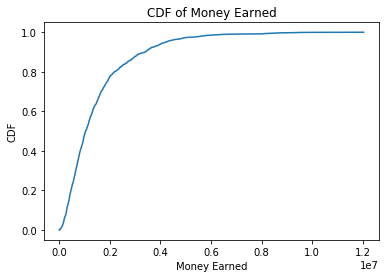

In [108]:
#CDF of money earned on tour.

import numpy as np

x = np.sort(pga_data['Money'])
y = np.arange(1, len(x)+1)/float(len(x))

plt.plot(x,y)
plt.xlabel('Money Earned')
plt.ylabel('CDF')
plt.title('CDF of Money Earned')
plt.show



<function matplotlib.pyplot.show(*args, **kw)>

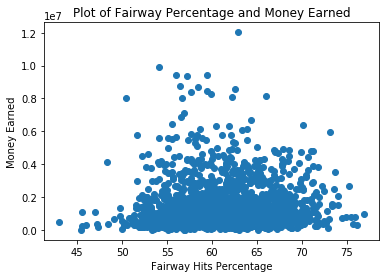

In [135]:
plt.scatter(pga_data['Fairway Percentage'], pga_data['Money'])
plt.xlabel('Fairway Hits Percentage')
plt.ylabel('Money Earned')
plt.title('Plot of Fairway Percentage and Money Earned')
plt.show

In [121]:
corr = pga_data[['Fairway Percentage', 'Money']].corr(method = 'pearson')
corr

,Fairway Percentage,Money
Fairway Percentage,1.00000,0.01787
Money,0.01787,1.00000


The correlation coefficient is 0.01787. This is a low coefficient and shows there is a very weak relationship between the two variables, Fairway Percentage and Money. This isn't surprising judging from how the scatter plot looks. It shows us there isn't a linear relationship with the data.

In [122]:
cov = pga_data[['Fairway Percentage', 'Money']].cov()
cov

,Fairway Percentage,Money
Fairway Percentage,25.591911,1.275132e+05
Money,127513.202743,1.989568e+12


In [125]:
from scipy import stats

pga_data[['Fairway Percentage', 'Money']].describe()
ttest,pval = stats.ttest_rel(pga_data['Fairway Percentage'], pga_data['Money'])
print(pval)
if pval < 0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

4.600212413181228e-274
reject null hypothesis


This makes sense to me because of the correlation value we obtained. There is not enough evidence to accept the null hypothesis which was 'Does a higher number of fairways hit lead to more money made on the PGA?'.

In [128]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(pga_data[['Fairway Percentage', 'gir']], pga_data.Money)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [129]:
reg.coef_

array([-28488.93360028, 179754.40518407])

In [130]:
reg.intercept_

-8567466.39359179

In [132]:
reg.predict([[60, 80] ])

array([4103550.00511665])

We can see our regression equation looks like this:

Money made = -28,488.93*Fairway Percentage + 179,754.41*gir

In this model the green in regulation has a higher weight on the equation. I ran a prediction to see what a player is predicted to make for the season if they hit 60% of their fairways and 80% of their greens in regulation. The prediction value is $4,103,550. This makes sense because this player is above average in greens in regulation which equates to a higher payout. 